In [1]:
import pandas as pd
import numpy as np

# Load BLAST results
blast_results = pd.read_csv("blast_results.txt", sep="\t", header=None)
blast_results.columns = ["Query", "Subject", "Identity", "Align_Len", "Mismatches", 
                         "Gap_Opens", "Q_Start", "Q_End", "S_Start", "S_End", "Evalue", "Bit_Score"]

# List of unique sequences
proteins = list(blast_results["Query"].unique())

# Initialize distance matrix
distance_matrix = pd.DataFrame(1.0, index=proteins, columns=proteins)

# Populate distance matrix
for _, row in blast_results.iterrows():
    q, s, identity = row["Query"], row["Subject"], row["Identity"]
    distance = 1 - (identity / 100.0)
    distance_matrix.loc[q, s] = distance
    distance_matrix.loc[s, q] = distance  # Symmetric

# Save to file
distance_matrix.to_csv("distance_matrix.txt", sep="\t")
print("Distance matrix saved to distance_matrix.txt")

Distance matrix saved to distance_matrix.txt


In [7]:
import re

fasta_file = "./data/all_proteins.fasta"
id_to_name = {}

with open(fasta_file, "r") as f:
    for line in f:
        if line.startswith(">"):
            # Extract ID and name
            match = re.match(r">(\S+).*?\[([\w\s]+)\]", line)
            if match:
                protein_id = match.group(1)
                species = match.group(2).lower().replace(" ", "_")
                description = line.split(" ", 1)[1].strip()
                protein_name = re.match(r"(\w+)", description).group(1).lower()
                id_to_name[protein_id] = f"{protein_name}-{species}"

distance_matrix_file = "distance_matrix.txt"
distance_matrix = pd.read_csv(distance_matrix_file, sep="\t", index_col=0)

distance_matrix.rename(index=id_to_name, columns=id_to_name, inplace=True)

distance_matrix.to_csv("distance_matrix_named.txt", sep="\t")
print("Updated distance matrix saved to distance_matrix_named.txt")


Updated distance matrix saved to distance_matrix_named.txt


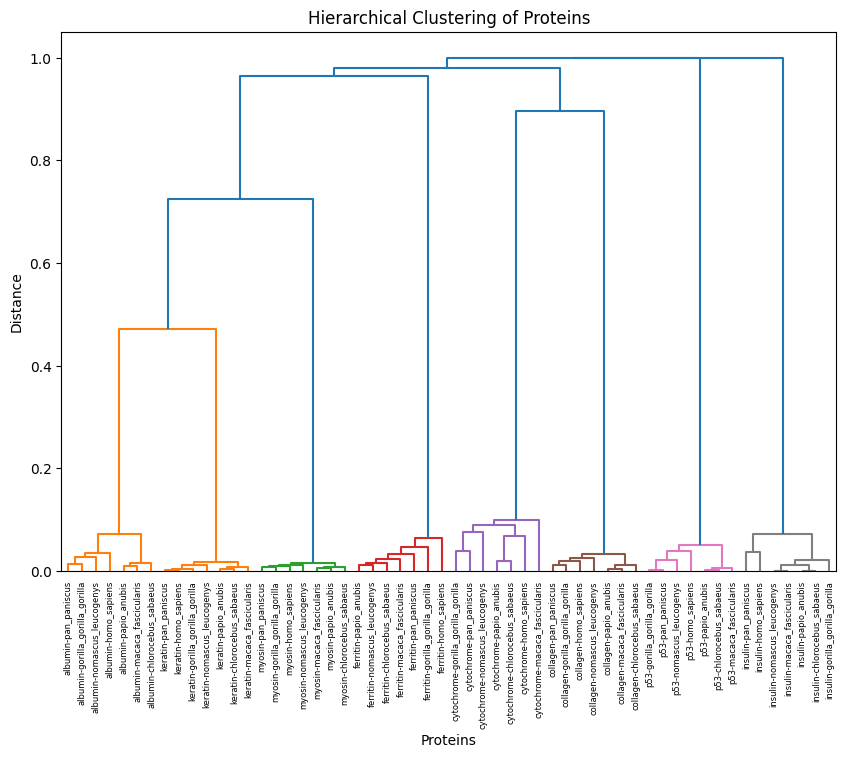

In [8]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

distance_matrix = pd.read_csv("distance_matrix_named.txt", sep="\t", index_col=0)

from scipy.spatial.distance import squareform
condensed_matrix = squareform(distance_matrix.values)

linked = linkage(condensed_matrix, method="average")  # UPGMA method

plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    labels=distance_matrix.index.tolist(),
    orientation="top",
    distance_sort="descending",
    show_leaf_counts=True,
)
plt.title("Hierarchical Clustering of Proteins")
plt.xlabel("Proteins")
plt.ylabel("Distance")
plt.show()

In [22]:
# File path for the FASTA file
fasta_file = "./data/all_proteins.fasta"

# Initialize lists to store parsed data
protein_names = []
species_list = []
sequences = []

# Variables to hold sequence data while parsing
current_protein = None
current_species = None
current_sequence = []

# Parse the FASTA file
with open(fasta_file, "r") as f:
    for line in f:
        line = line.strip()
        if line.startswith(">"):  # Header line
            if current_protein and current_species and current_sequence:
                # Append the previous sequence data
                protein_names.append(current_protein)
                species_list.append(current_species)
                sequences.append("".join(current_sequence))
            # Reset for the new entry
            current_sequence = []
            # Extract protein name and species using regex
            match = re.match(r">.*? (\w+).*?\[([^\]]+)\]", line)
            if match:
                current_protein = match.group(1).lower()
                current_species = match.group(2).strip().lower().replace(" ", "_")
            else:
                current_protein = None
                current_species = None
        else:
            # Sequence line
            current_sequence.append(line)

    # Add the last sequence
    if current_protein and current_species and current_sequence:
        protein_names.append(current_protein)
        species_list.append(current_species)
        sequences.append("".join(current_sequence))

# Create a DataFrame
df = pd.DataFrame({
    "protein_name": protein_names,
    "species": species_list,
    "sequence": sequences
})
df

,protein_name,species,sequence
0,albumin,gorilla_gorilla_gorilla,MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEETFKAL...
1,albumin,pan_paniscus,MKWVTFISLLFLFSSAYSRGVFRRDAHKSEVAHRFKDLGEENFKAL...
2,albumin,homo_sapiens,MKWVTFISLLFLFSSAYSRGVFRRDALFIFFFPCPDKSEVAHRFKD...
3,albumin,nomascus_leucogenys,MKWVTFISLLLLFSSAYSRGVFRRDAHKSEIAHRFKDLGEENFKAL...
4,albumin,macaca_fascicularis,MKWVTFISLLFLFSSAYSRGVFRRDTHKSEVAHRFKDLGEEHFKGL...
5,albumin,papio_anubis,MKWVTFISLLFLFSSAYSRGVFRRDTHKSEVAHRFKDLGEEHFKGL...
6,albumin,chlorocebus_sabaeus,MKWVTFISLLFLFSSAYSRGVFRRDAHKSEIAHRFKDLGEEHFKGL...
7,collagen,chlorocebus_sabaeus,MHPGLWLLLVTLCLMEELAGAGEKSYGKPCGGQDCSGSCQCFPEKG...
8,collagen,gorilla_gorilla_gorilla,MHPGLWLLLVTLCLTEELAGAGEKFYGKPCGGQDCSGSCQCFPEKG...
9,collagen,homo_sapiens,MHPGLWLLLVTLCLTEELAAAGEKSYGKPCGGQDCSGSCQCFPEKG...


In [23]:
df.to_csv("protein_sequences.csv", index=False)

In [25]:
from Bio.Seq import reverse_complement
from itertools import product
import pandas as pd

def count_kmers(sequence, k):
    """
    Counts k-mer frequencies in a DNA sequence, including reverse complements.
    
    Args:
        sequence (str): The DNA sequence (uppercase/lowercase treated equally).
        k (int): The k-mer length.
    
    Returns:
        dict: A dictionary with k-mers and their normalized frequencies.
    """
    # Normalize sequence to uppercase
    sequence = sequence.upper()
    
    # Generate canonical k-mers (min of k-mer and its reverse complement)
    kmers = {}
    for p in product('ACGT', repeat=k):
        kmer = ''.join(p)
        rev_comp = reverse_complement(kmer)
        canonical_kmer = min(kmer, rev_comp)
        if canonical_kmer not in kmers:
            kmers[canonical_kmer] = 0
    
    # Slide through the sequence and count k-mers
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i+k]
        rev_comp = reverse_complement(kmer)
        canonical_kmer = min(kmer, rev_comp)
        if canonical_kmer in kmers:
            kmers[canonical_kmer] += 1
    
    # Normalize frequencies
    sequence_length = len(sequence)
    kmers = {k: v / sequence_length for k, v in kmers.items()}
    
    return kmers

def process_kmer_for_df(df, k):
    """
    Processes a DataFrame of sequences to compute k-mer frequencies for a range of k.
    
    Args:
        df (pd.DataFrame): Input DataFrame containing sequences and metadata.
        k (int): k-mer length.
    
    Returns:
        pd.DataFrame: DataFrame with k-mer features added.
    """
    
    df_kmer = df.copy()
    df_kmer['sequence'] = df_kmer['sequence'].str.upper()

    # Compute k-mer frequencies and add this dict as new columns
    kmers = df_kmer['sequence'].apply(lambda x: count_kmers(x, k))
    kmers = pd.DataFrame(kmers.tolist())
    kmers.columns = [f'{col}' for col in kmers.columns]
    df_kmer = pd.concat([kmers, df_kmer[['protein_name', 'species']]], axis=1)

    return df_kmer

In [27]:
df_kmer = process_kmer_for_df(df, 3)
df_kmer.to_csv("protein_sequences_kmer.csv", index=False)

In [30]:
from sklearn.cluster import KMeans
import numpy as np

X = df_kmer.drop(columns=["protein_name", "species"])
kmeans = KMeans(n_clusters=8, random_state=0).fit(X)
df_kmer["cluster"] = kmeans.labels_

df_kmer

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,GAC,GCA,GCC,GGA,GTA,TAA,TCA,protein_name,species,cluster
0,0.001642,0.001642,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,gorilla_gorilla_gorilla,4
1,0.001642,0.001642,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,pan_paniscus,4
2,0.001618,0.001618,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,homo_sapiens,4
3,0.001642,0.001642,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,nomascus_leucogenys,4
4,0.001645,0.001645,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,macaca_fascicularis,4
5,0.001645,0.001645,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,papio_anubis,4
6,0.001645,0.001645,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,albumin,chlorocebus_sabaeus,4
7,0.000000,0.000593,0.001186,0.0,0.000000,0.0,0.000000,0.000593,0.001778,0.0,...,0.000593,0.0,0.0,0.000593,0.000000,0.001186,0.000000,collagen,chlorocebus_sabaeus,1
8,0.000000,0.000593,0.001186,0.0,0.000000,0.0,0.000000,0.000593,0.001778,0.0,...,0.000593,0.0,0.0,0.000593,0.000000,0.001186,0.000000,collagen,gorilla_gorilla_gorilla,1
9,0.000596,0.000596,0.001788,0.0,0.000000,0.0,0.000000,0.000596,0.001788,0.0,...,0.000596,0.0,0.0,0.000596,0.000000,0.001192,0.000000,collagen,homo_sapiens,1


In [31]:
df_kmer.to_csv("protein_sequences_kmer_clustered.csv", index=False)

Processing protein group: albumin
Tree for albumin saved as trees/albumin_tree.xml


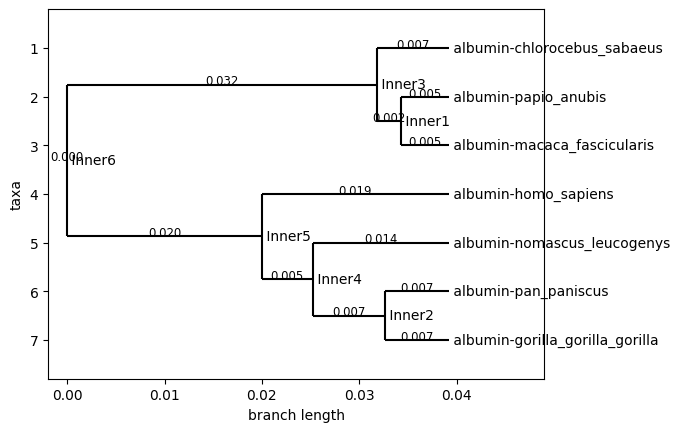

Processing protein group: collagen
Tree for collagen saved as trees/collagen_tree.xml


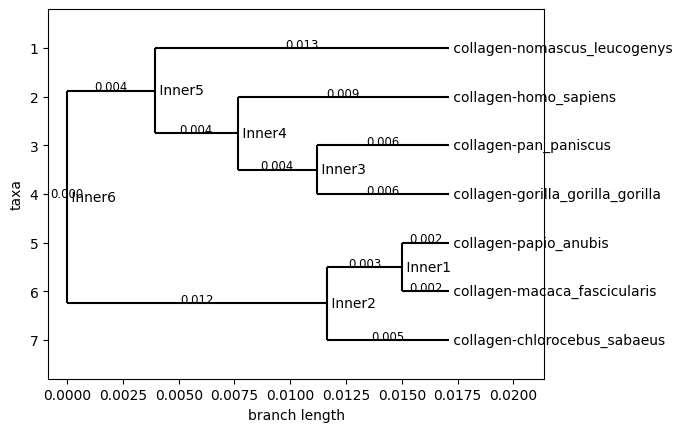

Processing protein group: cytochrome
Tree for cytochrome saved as trees/cytochrome_tree.xml


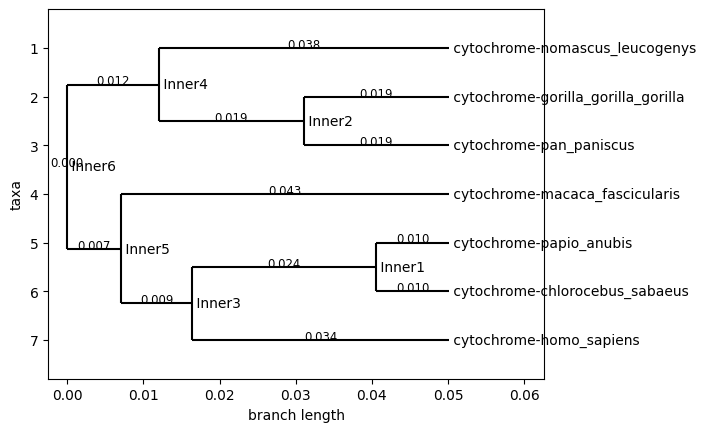

Processing protein group: ferritin
Tree for ferritin saved as trees/ferritin_tree.xml


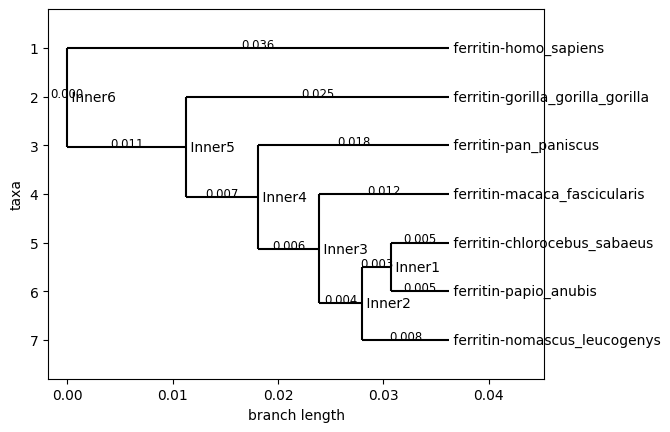

Processing protein group: insulin
Tree for insulin saved as trees/insulin_tree.xml


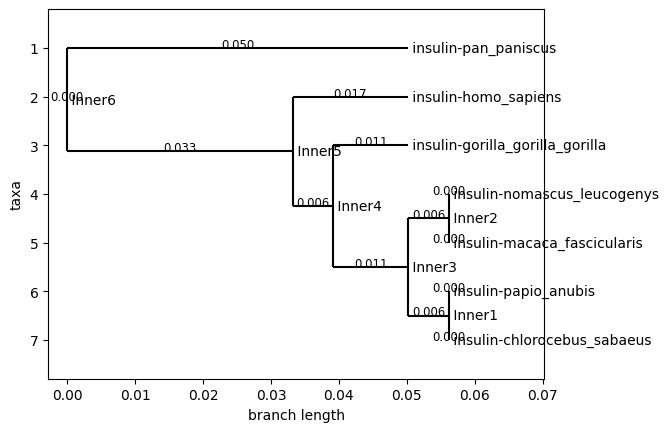

Processing protein group: keratin
Tree for keratin saved as trees/keratin_tree.xml


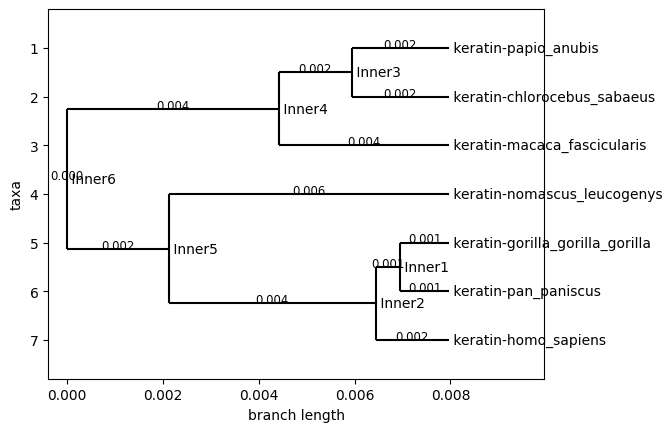

Processing protein group: myosin
Tree for myosin saved as trees/myosin_tree.xml


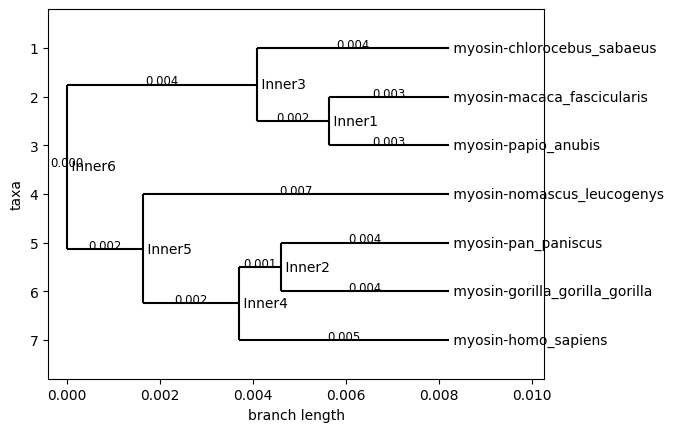

Processing protein group: p53
Tree for p53 saved as trees/p53_tree.xml


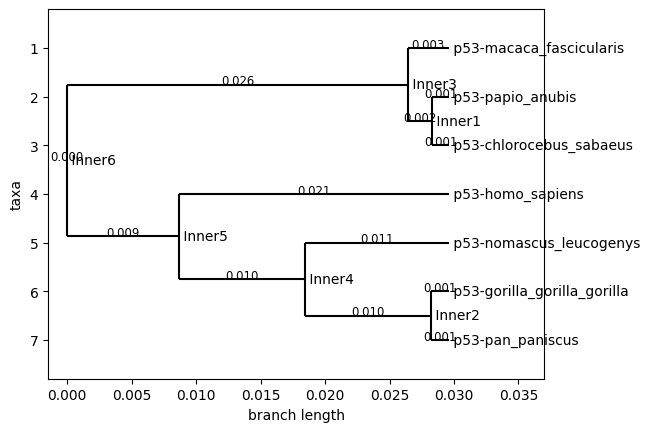

In [39]:
import pandas as pd
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import os

# List of protein groups
protein_names = ['albumin', 'collagen', 'cytochrome', 'ferritin', 'insulin', 'keratin', 'myosin', 'p53']

# Create output directories
os.makedirs("trees", exist_ok=True)

# Function to extract lower triangular matrix
def symmetric_to_lower_triangle(matrix):
    lower_triangle = []
    for i in range(len(matrix)):
        lower_triangle.append(matrix[i][: i + 1].tolist())
    return lower_triangle

# Process each protein group
for protein in protein_names:
    print(f"Processing protein group: {protein}")
    
    # Step 1: Extract submatrix for the group
    group_indices = [idx for idx in distance_matrix.index if idx.startswith(protein)]
    if not group_indices:
        print(f"No data found for protein group {protein}. Skipping...")
        continue
    
    submatrix = distance_matrix.loc[group_indices, group_indices]
    
    # Step 2: Convert submatrix to lower triangular format
    labels = list(submatrix.index)
    symmetric_matrix = submatrix.values
    lower_triangle_matrix = symmetric_to_lower_triangle(symmetric_matrix)
    
    # Step 3: Create Biopython DistanceMatrix
    bio_distance_matrix = _DistanceMatrix(labels, lower_triangle_matrix)

    # Step 4: Build the tree using UPGMA
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(bio_distance_matrix)
    
    # Step 5: Save the tree
    tree_file = f"trees/{protein}_tree.xml"
    Phylo.write(tree, tree_file, "phyloxml")
    
    # Optional: Visualize the tree
    print(f"Tree for {protein} saved as {tree_file}")
    Phylo.draw(tree, branch_labels=lambda c: f"{c.branch_length:.3f}")

In [50]:
labels = list(distance_matrix.index)
symmetric_matrix = distance_matrix.values
lower_triangle_matrix = symmetric_to_lower_triangle(symmetric_matrix)

# Create the Biopython DistanceMatrix
bio_distance_matrix = _DistanceMatrix(labels, lower_triangle_matrix)

# Build the tree using UPGMA
constructor = DistanceTreeConstructor()
full_tree = constructor.upgma(bio_distance_matrix)

# Save the tree
tree_file = "trees/full_tree.xml"
Phylo.write(full_tree, tree_file, "phyloxml")

# Visualize the tree
print(f"Full tree saved as {tree_file}")
full_tree.ladderize()
# Phylo.draw(full_tree, branch_labels=lambda c: f"{c.branch_length:.3f}")
Phylo.draw_ascii(full_tree)

Full tree saved as trees/full_tree.xml
        , insulin-pan_paniscus
        |
  ______, insulin-homo_sapiens
 |      |
 |      , insulin-gorilla_gorilla_gorilla
 |      |
 |      |, insulin-nomascus_leucogenys
 |      ||
 |      || insulin-macaca_fascicularis
 |      ||
 |       , insulin-papio_anubis
 |       |
 |       | insulin-chlorocebus_sabaeus
 |
 |              , p53-macaca_fascicularis
 |             ,|
 |             |, p53-papio_anubis
_|             ||
 |       ______|| p53-chlorocebus_sabaeus
 |      |      |
 |      |      |, p53-homo_sapiens
 |      |      ||
 |      |       , p53-nomascus_leucogenys
 |      |       |
 |      |       , p53-gorilla_gorilla_gorilla
 |      |       |
 |      |       | p53-pan_paniscus
 |      |
 |      |              , cytochrome-nomascus_leucogenys
 |      |             ,|
 |      |             |, cytochrome-gorilla_gorilla_gorilla
 |      |             ||
 |      |       ______|| cytochrome-pan_paniscus
 |______|      |      |
        |

Processing cluster: 4
Tree for cluster 4 saved as trees/cluster_4_tree.xml


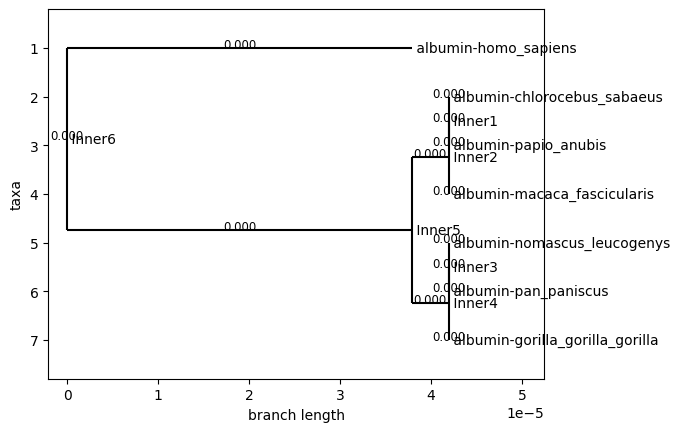

Processing cluster: 1
Tree for cluster 1 saved as trees/cluster_1_tree.xml


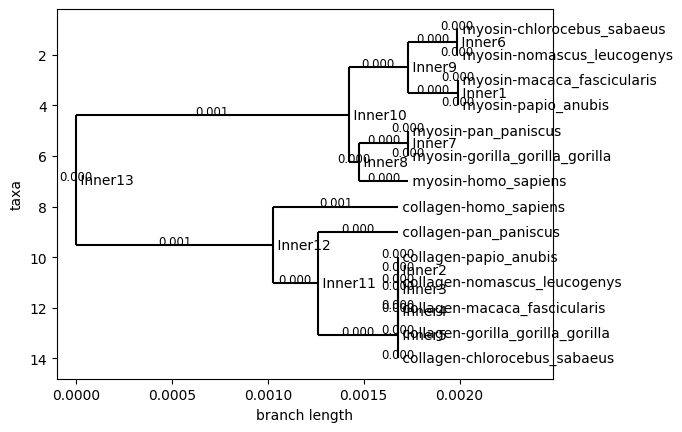

Processing cluster: 2
Tree for cluster 2 saved as trees/cluster_2_tree.xml


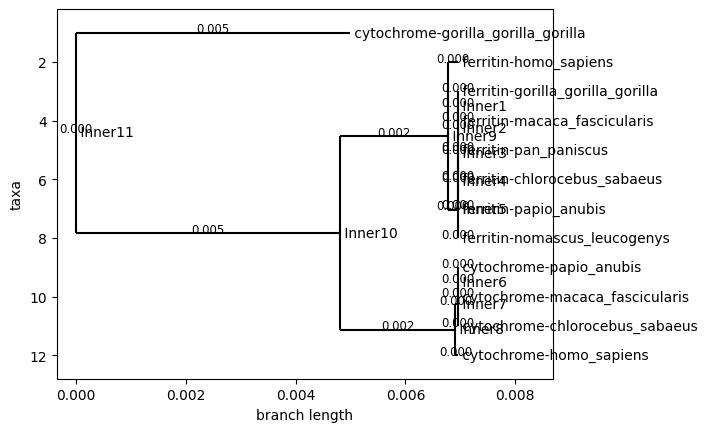

Processing cluster: 3
Tree for cluster 3 saved as trees/cluster_3_tree.xml


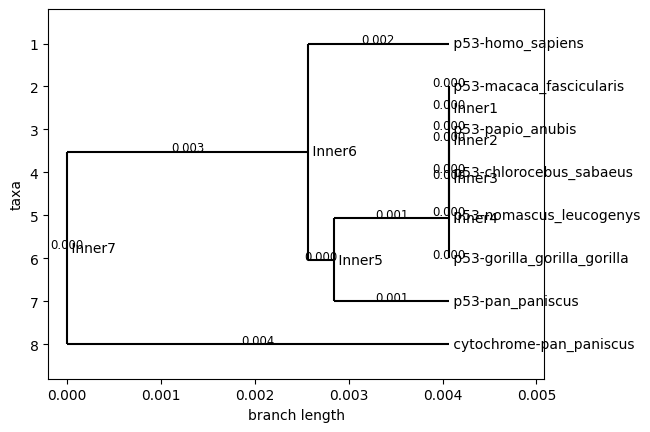

Processing cluster: 7
Skipping cluster 7 with less than 2 proteins
Processing cluster: 6
Tree for cluster 6 saved as trees/cluster_6_tree.xml


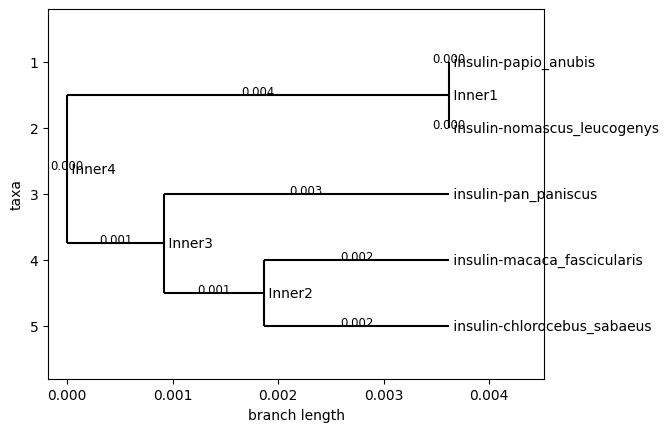

Processing cluster: 0
Tree for cluster 0 saved as trees/cluster_0_tree.xml


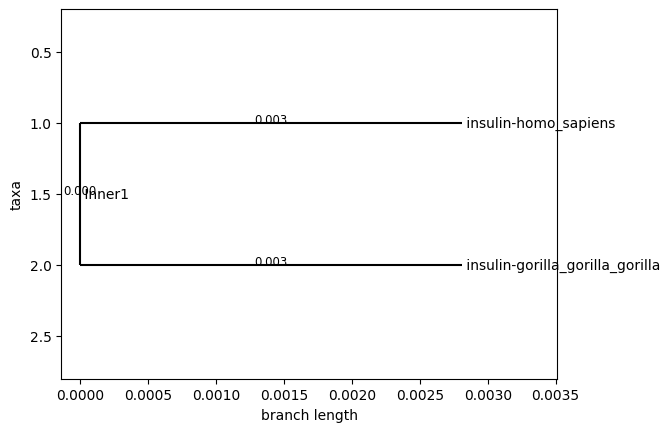

Processing cluster: 5
Tree for cluster 5 saved as trees/cluster_5_tree.xml


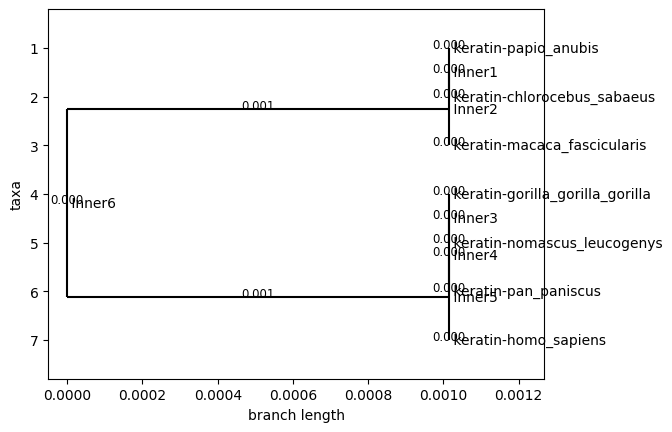

In [55]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, _DistanceMatrix
from Bio import Phylo
import os

# Create directories for output
os.makedirs("trees", exist_ok=True)

for cluster_number in df_kmer["cluster"].unique():
    print(f"Processing cluster: {cluster_number}")
    
    cluster_df = df_kmer[df_kmer["cluster"] == cluster_number]
    
    if len(cluster_df) < 2:
        print(f"Skipping cluster {cluster_number} with less than 2 proteins")
        continue

    observation_names = cluster_df.apply(
        lambda row: f"{row['protein_name']}-{row['species']}", axis=1
    ).tolist()
    
    kmer_columns = df_kmer.columns[:-3]
    kmer_vectors = cluster_df[kmer_columns].values
    
    distance_matrix = pairwise_distances(kmer_vectors, metric="euclidean")

    lower_triangle_matrix = symmetric_to_lower_triangle(distance_matrix)
    bio_distance_matrix = _DistanceMatrix(observation_names, lower_triangle_matrix)
    
    constructor = DistanceTreeConstructor()
    tree = constructor.upgma(bio_distance_matrix)
    
    tree_file = f"trees/cluster_{cluster_number}_tree.xml"
    Phylo.write(tree, tree_file, "phyloxml")
    print(f"Tree for cluster {cluster_number} saved as {tree_file}")
    
    Phylo.draw(tree, branch_labels=lambda c: f"{c.branch_length:.3f}")


In [53]:
df_kmer[df_kmer["cluster"] == 7]

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,GAC,GCA,GCC,GGA,GTA,TAA,TCA,protein_name,species,cluster
20,0.0,0.0,0.009524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,cytochrome,nomascus_leucogenys,7


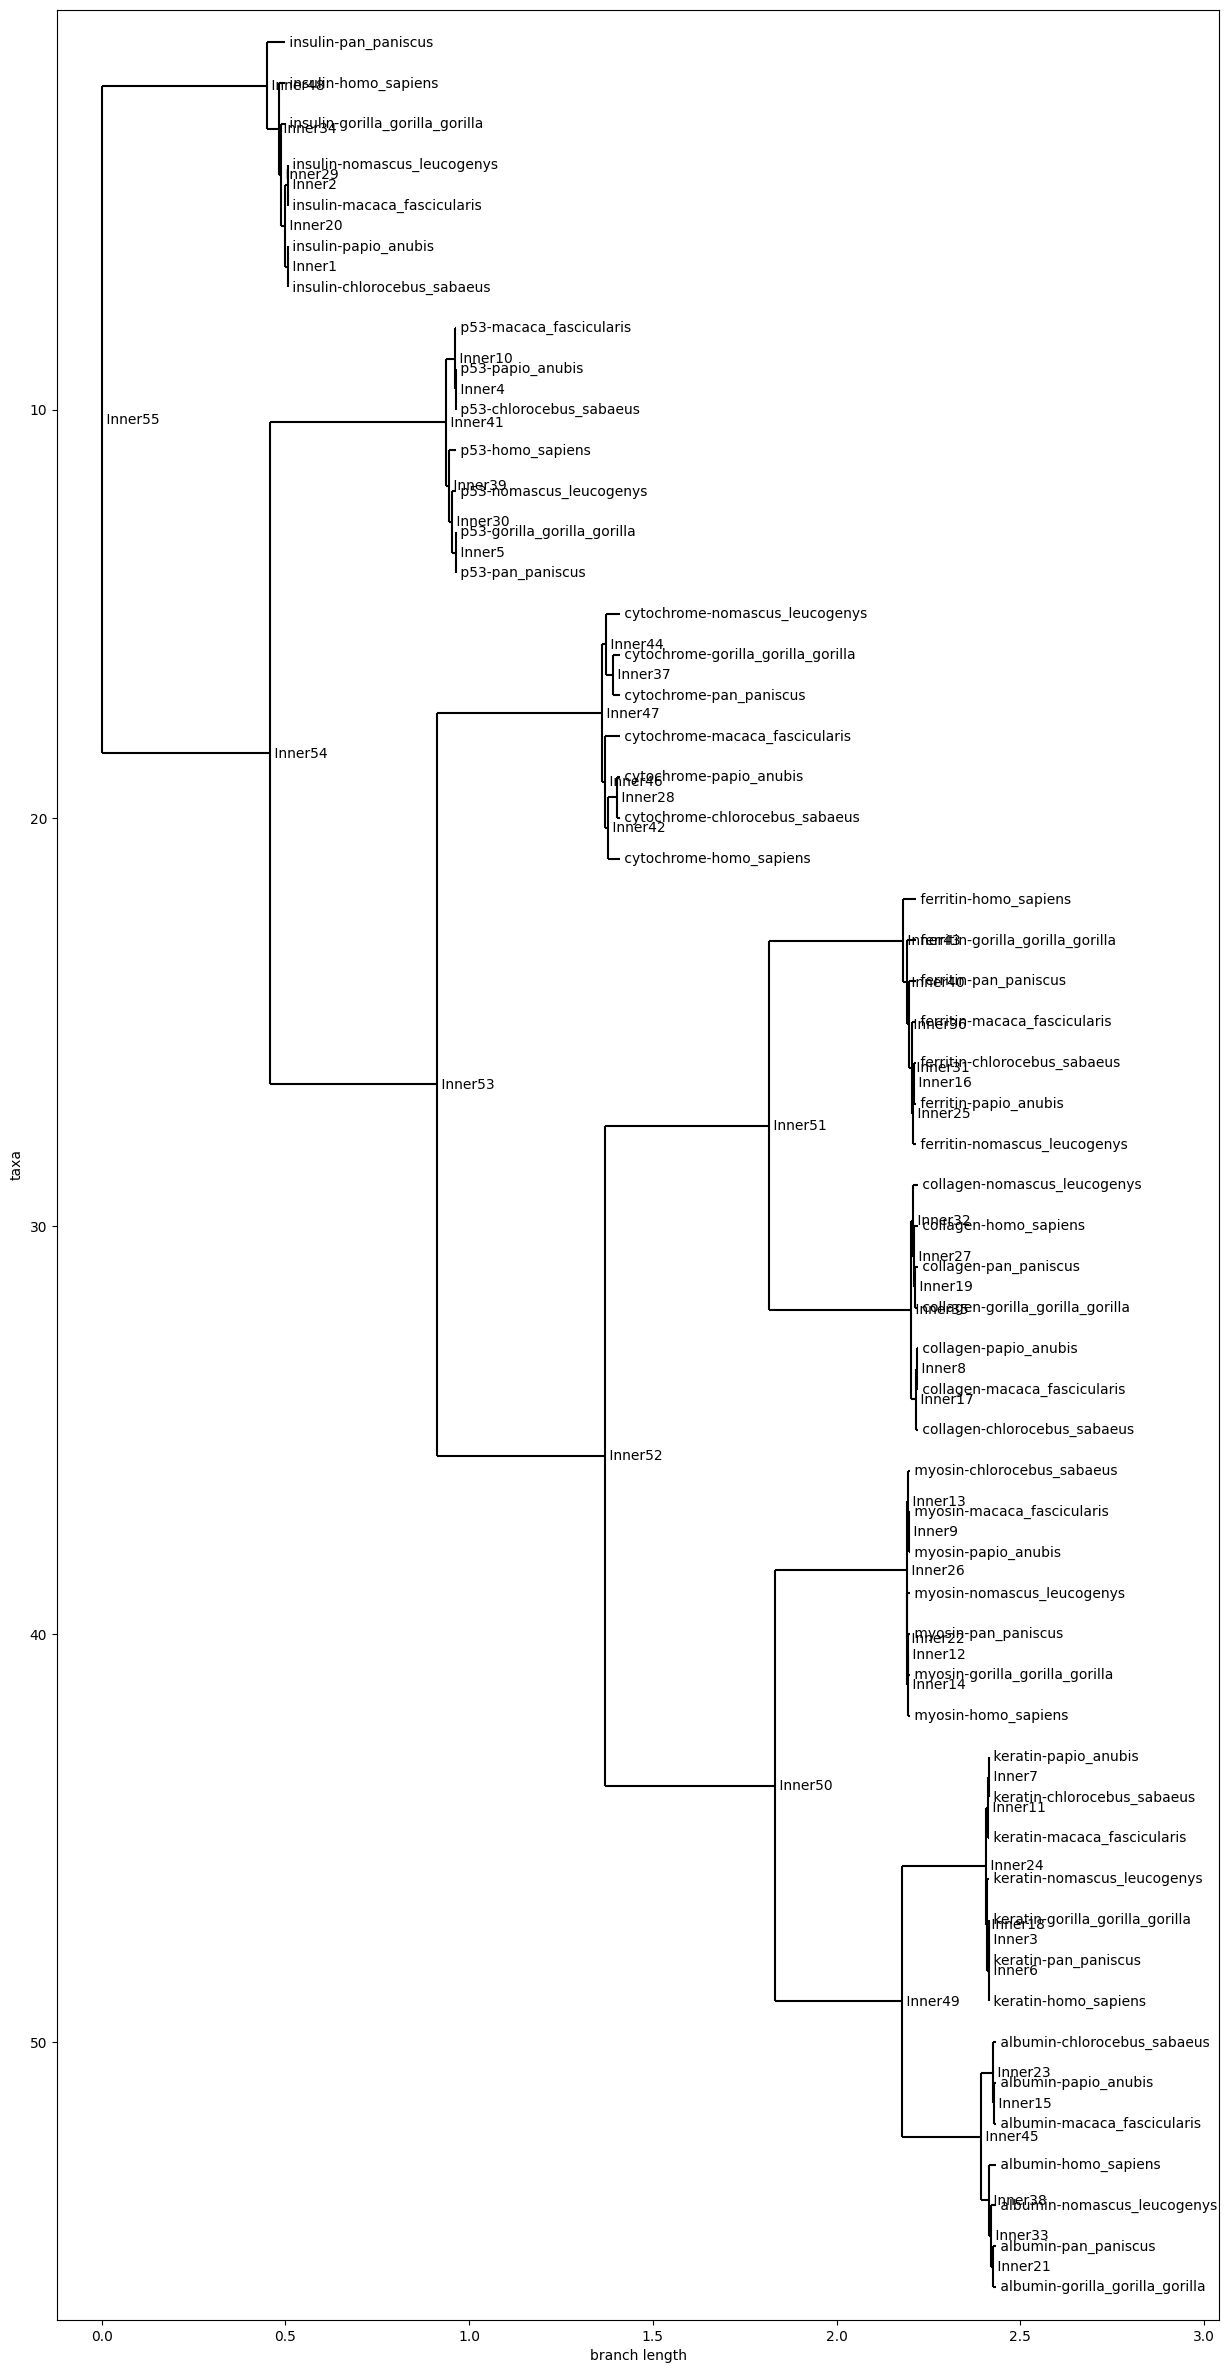

<Figure size 640x480 with 0 Axes>

In [2]:
from Bio import Phylo
import matplotlib.pyplot as plt

# Load the tree
tree = Phylo.read("./trees/full_tree.xml", "phyloxml")

# Customize figure
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=ax)

# Save as an image if needed
plt.savefig("phylogeny_tree.png", dpi=300)
plt.show()